In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Phase 1-

### 1. Load data

In [14]:
data = pd.read_csv('OnlineRetail.csv',encoding='ISO-8859-1')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


### 2. Check data

In [15]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  str    
 1   StockCode    541909 non-null  str    
 2   Description  540455 non-null  str    
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  str    
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  str    
dtypes: float64(2), int64(1), str(5)
memory usage: 33.1 MB


In [24]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### 3.Drop customer whoes id is missing.

In [23]:
data.dropna(subset=['CustomerID'], inplace=True)

### 4. Remove the rows in which there are negative value.

In [29]:
data.drop(data[data['Quantity'] < 0].index, inplace=True)

In [33]:
data[data['Quantity']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price


### 5. Create new column Total price having price*quantity.

In [32]:
data['Total_Price'] = data['Quantity'] * data['UnitPrice']

### 6. Change the text format date to date format.

In [35]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [37]:
data['InvoiceDate'].head(2)

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[us]

## Phase -2 

### RFM Calculation- (Recency Frequency Monetary)

In [38]:
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### a. Make a column for the analysis date names snapshot_date.

In [47]:
import datetime as dt
snapshot_date = data['InvoiceDate'].max() + dt.timedelta(days = 1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [48]:
data['Snapshot_date'] = snapshot_date

In [49]:
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Snapshot_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2011-12-10 12:50:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2011-12-10 12:50:00


### b. Doing the groupby on customers for uniqueness and aggregate functions on other parameter.

In [102]:
newda = data.groupby('CustomerID').agg({'InvoiceDate': lambda x:(snapshot_date - x.max()).days, 'InvoiceNo': 'nunique', 'Total_Price': 'sum'})

In [71]:
newda.head(2)

,InvoiceDate,InvoiceNo,Total_Price
CustomerID,,,
12346.0,326,1,77183.6
12347.0,2,7,4310.0


#### c. Renaming the column of new table.

In [103]:
newda.columns = ['Recency','Frequency','Monetary']
newda

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05


### d. Labeling the data of RFM and devide them into labels according to data.

In [105]:
newda['R_Score'] = pd.qcut(newda['Recency'],q=4,labels = [4,3,2,1])
newda['F_Score'] = pd.qcut(newda['Frequency'].rank(method = 'first'), q = 4, labels = [1,2,3,4])
newda['M_Score'] = pd.qcut(newda['Monetary'], q = 4, labels = [1,2,3,4])


#### e. Changing datatypes of each 3 columns so that they can be placed together so that study of the data will be easy.

In [106]:
newda['RFM_Count'] = newda['R_Score'].astype(str) + newda['F_Score'].astype(str) + newda['M_Score'].astype(str)
newda

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Count
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,114
12347.0,2,7,4310.00,4,4,4,444
12348.0,75,4,1797.24,2,3,4,234
12349.0,19,1,1757.55,3,1,4,314
12350.0,310,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...
18280.0,278,1,180.60,1,2,1,121
18281.0,181,1,80.82,1,2,1,121
18282.0,8,2,178.05,4,3,1,431


In [107]:
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Snapshot_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2011-12-10 12:50:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2011-12-10 12:50:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2011-12-10 12:50:00


#### f. Sorting the values based on the M_Score.

In [108]:
newda.sort_values('M_Score', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Count
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,114
14907.0,3,7,3501.10,4,4,4,444
15005.0,16,28,6316.57,4,4,4,444
14978.0,72,5,1931.42,2,4,4,244
14961.0,11,9,7044.68,4,4,4,444
14952.0,60,11,8099.49,2,4,4,244
14944.0,30,12,5900.25,3,4,4,344
14936.0,34,8,8137.02,3,4,4,344
14935.0,297,1,1784.71,1,1,4,114


In [109]:
newda.sort_values(['F_Score','M_Score'], ascending=False).head(10)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Count
CustomerID,,,,,,,
12347.0,2,7,4310.00,4,4,4,444
12352.0,36,8,2506.04,3,4,4,344
12362.0,3,10,5226.23,4,4,4,444
12388.0,16,6,2780.66,4,4,4,444
12395.0,19,12,3018.63,3,4,4,344
12415.0,24,21,124914.53,3,4,4,344
12417.0,3,9,3649.10,4,4,4,444
12423.0,1,8,1859.31,4,4,4,444
12428.0,26,9,7956.46,3,4,4,344


### g. Defining conditions omn the basis of RMF for meaingfull study and analysis of data about customer easily.

In [110]:
conditions = [(newda['RFM_Count'] == '444'),(newda['F_Score'] == 4) & (newda['R_Score'] >= 3), (newda['R_Score'] >= 2) & (newda['F_Score'] <= 2),(newda['M_Score'] == 4)]

In [111]:
choices = ['VIP','LOYAL','HIBERNATING','BIG SPENDERS']

In [112]:
newda['Segment'] = np.select(conditions,choices,default= 'Regular')

In [113]:
newda

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Count,Segment
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,HIBERNATING
12347.0,2,7,4310.00,4,4,4,444,VIP
12348.0,75,4,1797.24,2,3,4,234,BIG SPENDERS
12349.0,19,1,1757.55,3,1,4,314,BIG SPENDERS
12350.0,310,1,334.40,1,1,2,112,HIBERNATING
...,...,...,...,...,...,...,...,...
18280.0,278,1,180.60,1,2,1,121,HIBERNATING
18281.0,181,1,80.82,1,2,1,121,HIBERNATING
18282.0,8,2,178.05,4,3,1,431,Regular


In [114]:
newda['Segment'].value_counts()

Segment
Regular         1639
HIBERNATING     1504
VIP              489
LOYAL            477
BIG SPENDERS     230
Name: count, dtype: int64

#### h. Making countplot for analysing the each customers of each type.

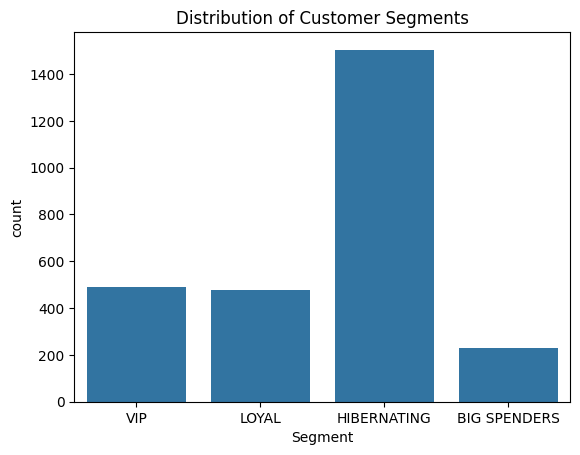

In [117]:
sns.countplot(x='Segment',data= newda,order = ['VIP','LOYAL','HIBERNATING','BIG SPENDERS'])
plt.title('Distribution of Customer Segments')

plt.show()